## 13 Pandas Example - Geolocations

Raw census data (from 1884, for a small region around Dresden). It is about two ethnic groups (Germans and Sorbs) and about their ratio in a set of settlements.

* It contains geolocations, but as a string. The geolocations are extracted from the string, via `df.str.split`. 
* Geolocations contain spurios characters, they are removed with `map`.
* The ratio of the ethic groups is plotted against the geolocation, making the core settlements visible.

Dataset is also available at:

* https://datahub.io/biblioteka-archiw/datenmuka#pandas

In [4]:
import pandas as pd

In [5]:
df = pd.read_excel("data/statistik_muka.xlsx")

In [6]:
df.head()

,Index_SI,Ortsname sorbisch,Ortsname deutsch,Wikidata,Geonames,Koordinaten,Anzahl Sorben 1884,Anzahl Deutsche 1884,Unnamed: 8,Prozent Sorbisch,Prozent deutsch
0,3,Bambruch,Bernbruch,Q25158489,NaN,"51.29575, 14.0948",7,258.0,NaN,2.641509,97.358491
1,4,Banecy,Pannewitz,Q160870,NaN,"51.233056, 14.318889",146,33.0,NaN,81.564246,18.435754
2,5,Bart,Baruth,Q160679,NaN,"51.224722, 14.592222",425,98.0,NaN,81.26195,18.73805
3,6,Baćoń,Storcha,Q160130,2826429.0,"51.22315, 14.30062",88,1.0,NaN,98.876404,1.123596
4,8,Běčicy,Pietzschwitz,Q10366821,NaN,"51.199444, 14.296389",103,13.0,NaN,88.793103,11.206897


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Index_SI              860 non-null    int64  
 1   Ortsname sorbisch     857 non-null    object 
 2   Ortsname deutsch      860 non-null    object 
 3   Wikidata              781 non-null    object 
 4   Geonames              105 non-null    float64
 5   Koordinaten           860 non-null    object 
 6   Anzahl Sorben 1884    860 non-null    int64  
 7   Anzahl Deutsche 1884  788 non-null    float64
 8   Unnamed: 8            0 non-null      float64
 9   Prozent Sorbisch      860 non-null    object 
 10  Prozent deutsch       860 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 74.0+ KB


In [8]:
df.describe()

,Index_SI,Geonames,Anzahl Sorben 1884,Anzahl Deutsche 1884,Unnamed: 8
count,860.000000,1.050000e+02,860.000000,788.000000,0.0
mean,577.446512,3.529919e+06,200.483721,179.431472,NaN
std,374.295303,1.425886e+06,300.557679,1077.337025,NaN
min,3.000000,2.804008e+06,0.000000,0.000000,NaN
25%,251.750000,2.851631e+06,60.000000,4.000000,NaN
50%,524.500000,2.898485e+06,134.500000,17.000000,NaN
75%,879.250000,2.948267e+06,254.250000,82.500000,NaN
max,1307.000000,8.051234e+06,4106.000000,21584.000000,NaN


In [9]:
df["Anzahl Sorben 1884"].sum()

172416

In [10]:
df["Anzahl Deutsche 1884"].sum()

141392.0

In [11]:
df["Anzahl Sorben 1884"].sum() / (df["Anzahl Deutsche 1884"].sum() + df["Anzahl Sorben 1884"].sum())

0.5494314995156274

In [12]:
latlng = df["Koordinaten"].str.split(",").apply(pd.Series)

In [13]:
latlng.head()

,0,1
0,51.29575,14.0948
1,51.233056,14.318889
2,51.224722,14.592222
3,51.22315,14.30062
4,51.199444,14.296389


In [14]:
latlng.columns = ["lat", "lng"]

In [15]:
latlng.head()

,lat,lng
0,51.29575,14.0948
1,51.233056,14.318889
2,51.224722,14.592222
3,51.22315,14.30062
4,51.199444,14.296389


In [16]:
latlng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lat     860 non-null    object
 1   lng     860 non-null    object
dtypes: object(2)
memory usage: 13.6+ KB


In [18]:
# latlng.astype(float) # ValueError: could not convert string to float: ' 14.736111°'

In [19]:
latlng['lat'] = latlng['lat'].map(lambda x: x.replace("°", ""))
latlng['lng'] = latlng['lng'].map(lambda x: x.replace("°", ""))

In [20]:
latlng = latlng.astype(float)

In [21]:
merged = pd.concat([df, latlng], axis=1)

In [22]:
merged.head()

,Index_SI,Ortsname sorbisch,Ortsname deutsch,Wikidata,Geonames,Koordinaten,Anzahl Sorben 1884,Anzahl Deutsche 1884,Unnamed: 8,Prozent Sorbisch,Prozent deutsch,lat,lng
0,3,Bambruch,Bernbruch,Q25158489,NaN,"51.29575, 14.0948",7,258.0,NaN,2.641509,97.358491,51.295750,14.094800
1,4,Banecy,Pannewitz,Q160870,NaN,"51.233056, 14.318889",146,33.0,NaN,81.564246,18.435754,51.233056,14.318889
2,5,Bart,Baruth,Q160679,NaN,"51.224722, 14.592222",425,98.0,NaN,81.26195,18.73805,51.224722,14.592222
3,6,Baćoń,Storcha,Q160130,2826429.0,"51.22315, 14.30062",88,1.0,NaN,98.876404,1.123596,51.223150,14.300620
4,8,Běčicy,Pietzschwitz,Q10366821,NaN,"51.199444, 14.296389",103,13.0,NaN,88.793103,11.206897,51.199444,14.296389


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='lng', ylabel='lat'>

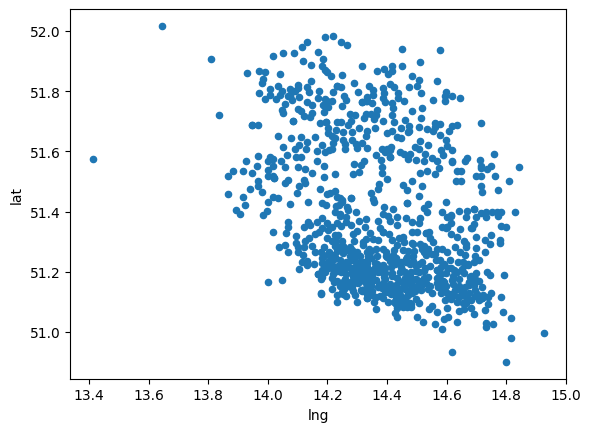

In [24]:
merged.plot(kind="scatter", x="lng", y="lat")

In [25]:
# merged["Prozent Sorbisch"].astype(float) # ValueError: could not convert string to float: 'kleiner Anteil'

In [27]:
merged[merged["Prozent Sorbisch"] == 'kleiner Anteil']

,Index_SI,Ortsname sorbisch,Ortsname deutsch,Wikidata,Geonames,Koordinaten,Anzahl Sorben 1884,Anzahl Deutsche 1884,Unnamed: 8,Prozent Sorbisch,Prozent deutsch,lat,lng
10,15,Bischdorf,Bischdorf,NaN,NaN,"51.092749, 14.738737",13,NaN,NaN,kleiner Anteil,überwiegend deutsch,51.092749,14.738737
11,16,Biskopicy,Bischofswerda,Q81717,2948267.0,"51.12771, 14.17974",86,NaN,NaN,kleiner Anteil,überwiegend deutsch,51.127710,14.179740
28,35,Brěznja,Wiesa,Q160415,NaN,"51.255, 14.118333",6,NaN,NaN,kleiner Anteil,überwiegend deutsch,51.255000,14.118333
56,67,Dažink,Kleindehsa,Q1746390,NaN,"51.105556, 14.595833",13,NaN,NaN,kleiner Anteil,überwiegend deutsch,51.105556,14.595833
72,85,Dołhaćicy,Dolgowitz,Q161024,NaN,"51.114722, 14.739722",3,NaN,NaN,kleiner Anteil,überwiegend deutsch,51.114722,14.739722
...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1280,Horni Hródk,Spremberg (Dorf) (Neusalza-Spremberg),NaN,NaN,"51.031361, 14.520545",45,NaN,NaN,kleiner Anteil,überwiegend deutsch,51.031361,14.520545
855,1285,Marijiny Doł,Marienthal,Q513610,NaN,"50.997755, 14.925608",16,NaN,NaN,kleiner Anteil,überwiegend deutsch,50.997755,14.925608
856,1286,Wodowe Hendrichecy,Seifhennersdorf,Q165195,2833365.0,"50.933333, 14.616667",24,NaN,NaN,kleiner Anteil,überwiegend deutsch,50.933333,14.616667
857,1287,Žitawa,Zittau,Q157200,2804008.0,"50.9, 14.8",77,NaN,NaN,kleiner Anteil,überwiegend deutsch,50.900000,14.800000


In [28]:
merged.loc[merged["Prozent Sorbisch"] == 'kleiner Anteil', "Prozent Sorbisch"] = "5.0"

In [29]:
merged[merged["Prozent Sorbisch"] == 'kleiner Anteil']

,Index_SI,Ortsname sorbisch,Ortsname deutsch,Wikidata,Geonames,Koordinaten,Anzahl Sorben 1884,Anzahl Deutsche 1884,Unnamed: 8,Prozent Sorbisch,Prozent deutsch,lat,lng


In [30]:
merged["sorbian"] = merged["Prozent Sorbisch"].astype(float) / 100

In [31]:
merged.head()

,Index_SI,Ortsname sorbisch,Ortsname deutsch,Wikidata,Geonames,Koordinaten,Anzahl Sorben 1884,Anzahl Deutsche 1884,Unnamed: 8,Prozent Sorbisch,Prozent deutsch,lat,lng,sorbian
0,3,Bambruch,Bernbruch,Q25158489,NaN,"51.29575, 14.0948",7,258.0,NaN,2.641509,97.358491,51.295750,14.094800,0.026415
1,4,Banecy,Pannewitz,Q160870,NaN,"51.233056, 14.318889",146,33.0,NaN,81.564246,18.435754,51.233056,14.318889,0.815642
2,5,Bart,Baruth,Q160679,NaN,"51.224722, 14.592222",425,98.0,NaN,81.26195,18.73805,51.224722,14.592222,0.812620
3,6,Baćoń,Storcha,Q160130,2826429.0,"51.22315, 14.30062",88,1.0,NaN,98.876404,1.123596,51.223150,14.300620,0.988764
4,8,Běčicy,Pietzschwitz,Q10366821,NaN,"51.199444, 14.296389",103,13.0,NaN,88.793103,11.206897,51.199444,14.296389,0.887931


<Axes: title={'center': 'Muka, 1884'}, xlabel='lng', ylabel='lat'>

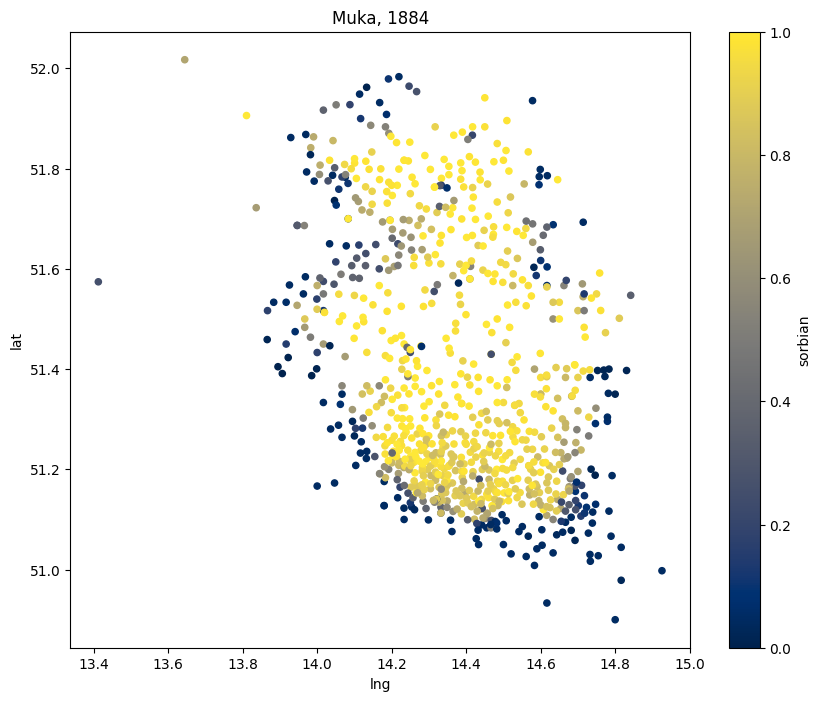

In [36]:
merged.plot(kind="scatter", x="lng", y="lat", c="sorbian", figsize=(10, 8), title="Muka, 1884", colormap='cividis')
# https://matplotlib.org/stable/users/explain/colors/colormaps.html